# Task 1


In [29]:
import warnings

warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.datasets import load_boston



In [30]:
boston = load_boston()

boston.keys()

dict_keys= (['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [31]:
data = boston["data"]

data.shape

(506, 13)

In [32]:
feature_names = boston["feature_names"]

feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [33]:
target = boston["target"]

target[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [34]:
X = pd.DataFrame(data, columns=feature_names)

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [36]:
y = pd.DataFrame(target, columns=["price"])

y.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline


In [39]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [40]:
lr.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = lr.predict(X_test)

y_pred.shape

(152, 1)

In [42]:
check_test = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred.flatten(),
})

check_test.head(10)

,y_test,y_pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


In [43]:
from sklearn.metrics import r2_score
result1 = r2_score(y_test, y_pred)
result1

0.7112260057484909

# Task 2

In [48]:
from sklearn.ensemble import RandomForestRegressor as rfr

In [49]:
model = rfr(n_estimators=1000, max_depth=12, random_state=42)

In [50]:
model.fit(X_train, y_train.values[:,0])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [51]:
y_pred2 = model.predict(X_test)

y_pred2.shape

(152,)

In [52]:
check_test = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred2": y_pred2.flatten(),
})

check_test.head(10)

,y_test,y_pred2
173,23.6,22.806412
274,32.4,31.131464
491,13.6,16.339125
72,22.8,23.810726
452,16.1,17.139521
76,20.0,21.832284
316,17.8,19.895747
140,14.0,14.754118
471,19.6,21.240835
500,16.8,20.898658


In [53]:
result2 = r2_score(y_test, y_pred2)
result2

0.87472606157312

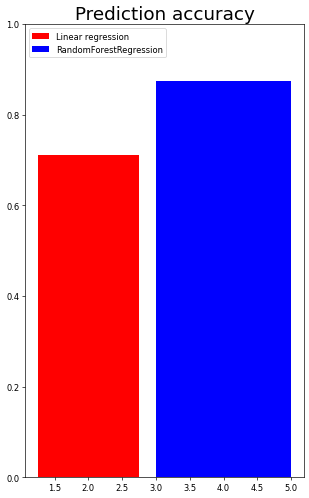

In [55]:
plt.figure(figsize=(6,10), dpi= 60)
plt.bar(2, result1, width=1.5, color='red', label='Linear regression' )
plt.bar(4, result2, width=2.0, color= 'blue', label='RandomForestRegression')
plt.ylim(0, 1)
plt.legend(loc='upper left')
plt.title("Prediction accuracy", fontsize=22)
plt.show()

Метод RandomForestRegressor работает точнее.

# Task 3

In [63]:
model.feature_importances_

array([0.03167574, 0.00154252, 0.00713813, 0.00123624, 0.01426897,
       0.40268179, 0.01429864, 0.06397257, 0.00528122, 0.01152493,
       0.01808108, 0.01245085, 0.41584732])

Text(0.5, 0, 'Random Forest Feature Importance')

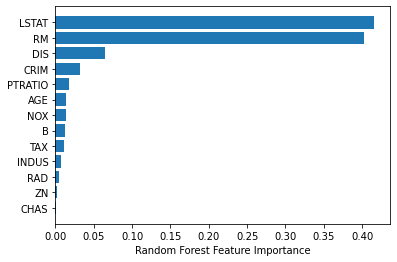

In [67]:
sorted_idx = model.feature_importances_.argsort()
plt.barh(boston.feature_names[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Признаки LSTAT, RM имеют наибольшую важность 